In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/sample_data/mediacompany.csv')
dict1=pd.read_csv('/content/sample_data/DataDictionary_mediacompany.csv')

In [3]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
df['Date']=pd.to_datetime(df.Date)

In [5]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN


In [6]:
# Deriving "days since the show started"
from datetime import date
d0 = pd.to_datetime(date(2017, 2, 28))
d1 = df.Date
delta = d1 - d0
df['day']= delta

In [7]:
df.day

0     1 days
1     2 days
2     3 days
3     4 days
4     5 days
       ...  
75   76 days
76   77 days
77   78 days
78   79 days
79   80 days
Name: day, Length: 80, dtype: timedelta64[ns]

In [8]:
#removing days word from day coloum
df['day'] = df['day'].astype(str)
df['day'] = df['day'].str[:-4]
df['day']=df['day'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,5


<Axes: xlabel='day'>

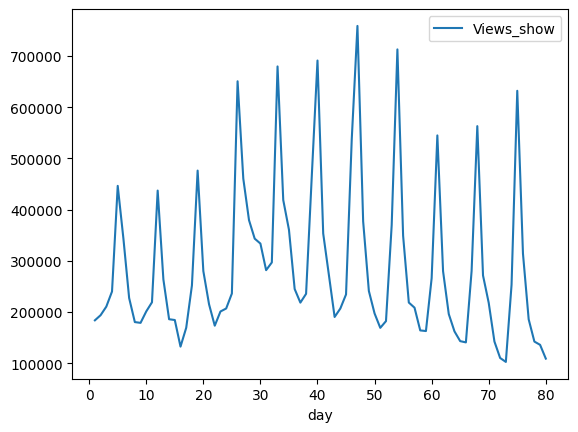

In [10]:
# days vs Views_show
df.plot.line(x='day', y='Views_show')

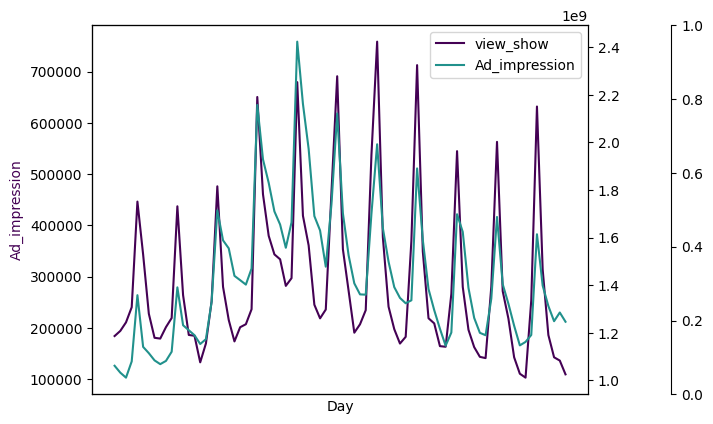

In [11]:
#plot for days vs views_show vs days vs Ad_impression

fig= plt.figure()
host=fig.add_subplot(111)
par1=host.twinx()
par2=host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View_show')
host.set_ylabel('Ad_impression')

color1=plt.cm.viridis(0)
color2=plt.cm.viridis(0.5)
color3=plt.cm.viridis(.9)

p1,=host.plot(df.day,df.Views_show,color=color1,label="view_show")
p2,=par1.plot(df.day,df.Ad_impression,color=color2,label="Ad_impression")

Ins=[p1,p2]
host.legend(handles=Ins,loc='best')
#right,left,top,bottom
par2.spines['right'].set_position(('outward',60))
#no x-ticks
par2.xaxis.set_ticks([])


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png",bbox_inches='tight')



In [12]:
#Derived Metrics
#weekdays are taken such that 1 corresponds to sunday and 7 to saturday
#genrate the weekday variable

df['weekday']=(df['day']+3)%7
df.weekday.replace(0,7,inplace=True)
df['weekday']=df['weekday'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,5,1


Running first model(lm1) Weekday and Visitors

In [13]:
#Putting feature variable to x
X=df[['Visitors','weekday']]
#putting response variable to y
y=df['Views_show']

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#intilizing linerRegression as lr

lr=LinearRegression()

In [16]:
lr.fit(X,y)

LinearRegression()

In [17]:
import statsmodels.api as sm
#unlike sklearn,statsmodels dont automatically fir a constant
#so you need to use the method as sm.addconstant(X) in order to add a constant
X=sm.add_constant(X)
#create a fiited model in one line
lr_1=sm.OLS(y,X).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 03 May 2024   Prob (F-statistic):           8.01e-12
Time:                        04:50:25   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [18]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

df['weekend']=[cond(i) for i in df['day']]

In [19]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,5,1,1


Running second model lm2 visitors and weekend


In [20]:
#putting feature vairable to x
X=df[['Visitors','weekend']]


#putting response variable to y
y=df['Views_show']

In [21]:
import statsmodels.api as sm
X=sm.add_constant(X)

#create a fitted model in one line
lr_2=sm.OLS(y,X).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.51e-12
Time:                        04:50:25   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

Running third model lr3 with visitors,weekend & character A(lead role actor)


In [22]:
#putting features to variable to X
X=df[['Visitors','weekend','Character_A']]

#putting resonse vairable to. y
y=df['Views_show']

In [23]:
import statsmodels.api as sm
#unlike  skleran,statsmodel donnt automatically fit a constant
#so we need to use method sm.add_constant(X) in order to add a constant

X=sm.add_constant(X)

#fitting model
lm_3=sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.53e-14
Time:                        04:50:25   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [24]:
# Create lag variable
df['Lag_Views'] = np.roll(df['Views_show'], 1)
df.Lag_Views.replace(108961,0, inplace=True)

In [25]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,5,1,1,240061


In [26]:
# Putting feature variable to X
X = df[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = df['Views_show']

Running fourth model (lm4) visitors, Character_A, Lag_views & weekend


In [27]:
import statsmodels.api as sm
#unlike  skleran,statsmodel donnt automatically fit a constant
#so we need to use method sm.add_constant(X) in order to add a constant
X=sm.add_constant(X)

#fitting model
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Fri, 03 May 2024   Prob (F-statistic):           3.16e-21
Time:                        04:50:25   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<Axes: >

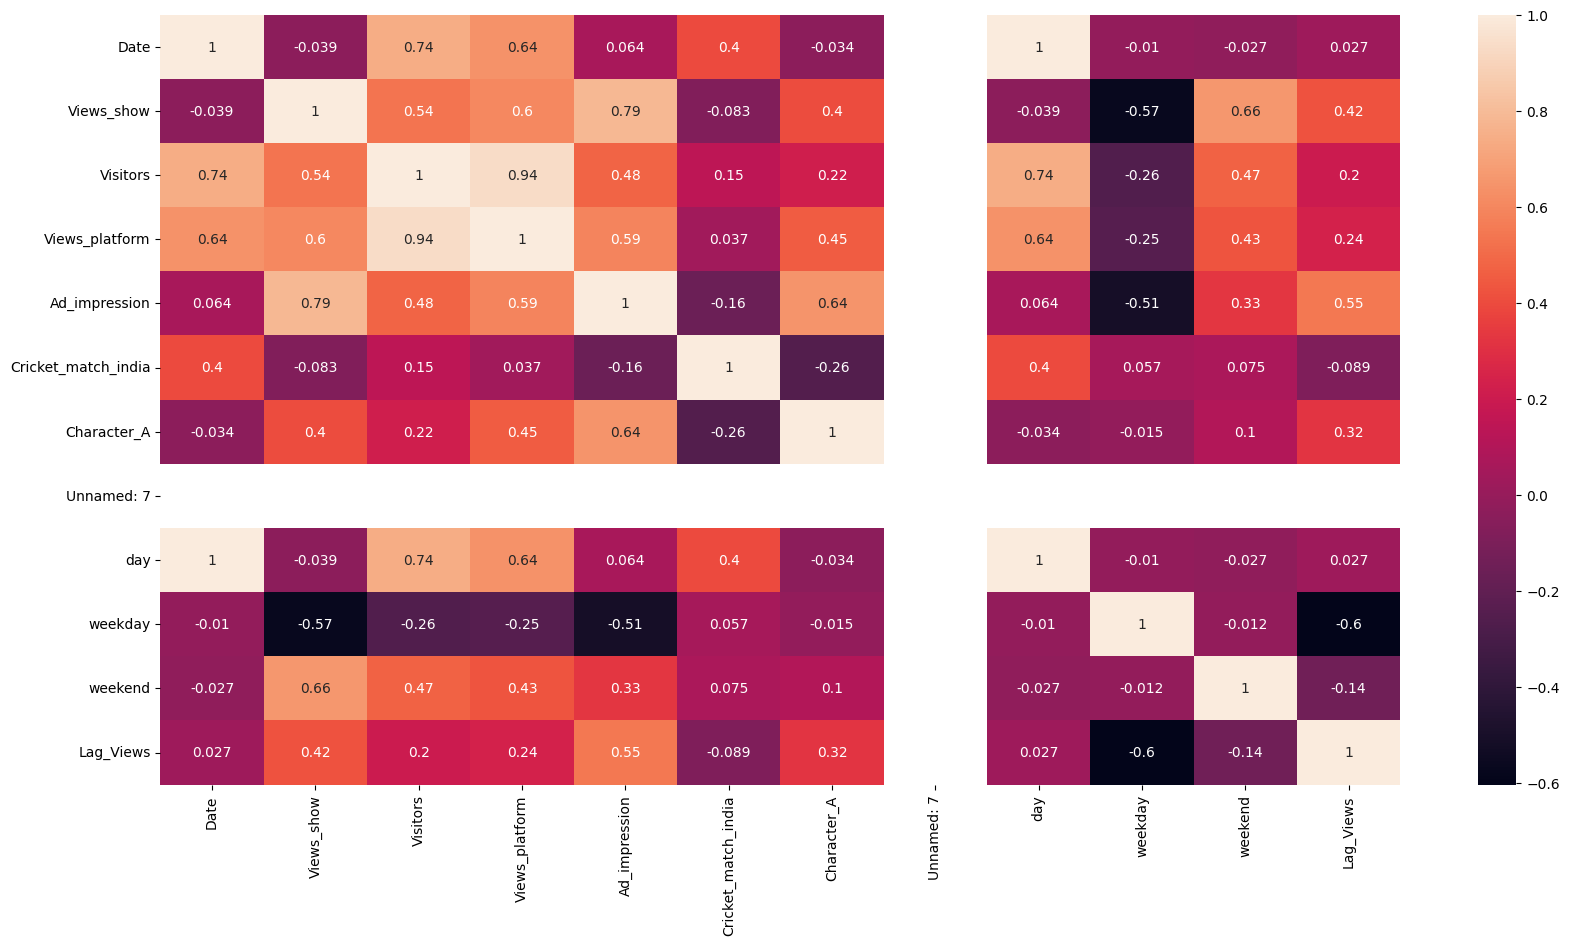

In [28]:
#ploting heatmap to see the correlation
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

Runnning 5th model with view_platfrom,visitors

In [29]:
# Putting feature variable to X
X = df[['Character_A','weekend','Views_platform']]

# Putting response variable to y
y = df['Views_show']

In [30]:
import statsmodels.api as sm
# unlike skleran, statsmodel dont automaticaly fit a constant
# adding constant manually to x

X=sm.add_constant(X)

#fitting model
lm_5 =sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Fri, 03 May 2024   Prob (F-statistic):           3.59e-15
Time:                        04:50:26   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

Running sixth model (lm6) Character_A, weekend & Visitors

In [31]:
# Putting feature variable to X
X = df[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = df['Views_show']

In [32]:
import statsmodels.api as sm
#unlike sklearn,stats models cant add constant to X
#we have to add constant manually to X
X=sm.add_constant(X)

#fitting model
lm_6=sm.OLS(y,X).fit()
print(lm_6.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.53e-14
Time:                        04:50:26   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

runnign 7th model lm7 with Character_A, weekend,Visitors and Ad_impression

In [33]:
#putting features variable to X
X=df[['weekend','Character_A','Visitors','Ad_impression']]
#putting response variable to y
y=df['Views_show']

In [34]:
import statsmodels.api as sm
#unlike sklearn, stats model dont automactically add constant to X
# adding contanst to X

X=sm.add_constant(X)
#fitting model
lm_7=sm.OLS(y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.10e-25
Time:                        04:50:26   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

runnign 8th model lm8  with Character_A, weekend and Ad_impression

In [35]:
# Putting feature variable to X
X = df[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = df['Views_show']

In [36]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant,
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.05e-26
Time:                        04:50:26   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

re-runnign 8th model lm8 with Character_A, weekend and Ad_impression

In [37]:
#converting Ad impression in million as its coef is 000
#which is not acceptable bcoz the views are in lakh and ad impresssion are in millon

df['ad_impression_million'] = df['Ad_impression']/1000000

In [38]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = df['Views_show']

In [39]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant,
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.05e-26
Time:                        04:50:26   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

Running seventh model (lm9) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [40]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = df['Views_show']

In [41]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant,
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.02e-25
Time:                        04:50:26   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

#### RE-Running seventh model (lm7) Character_A, weekend & ad_impressions_million as it gave higest score


In [42]:
# Putting feature variable to X
X = df[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = df['Views_show']

In [43]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant,
#so you need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)
# create a fitted model in one line
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.05e-26
Time:                        04:50:26   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

making predection using above model lm10

In [58]:
X = df[['weekend','Character_A','ad_impression_million']]
X=sm.add_constant(X)

Predicted_views = lm_10.predict(X)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(df.Views_show,Predicted_views)
r_squared=r2_score(df.Views_show,Predicted_views)

In [62]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4677651616.2534075
r_square_value : 0.802643446857565


Text(0, 0.5, 'Views')

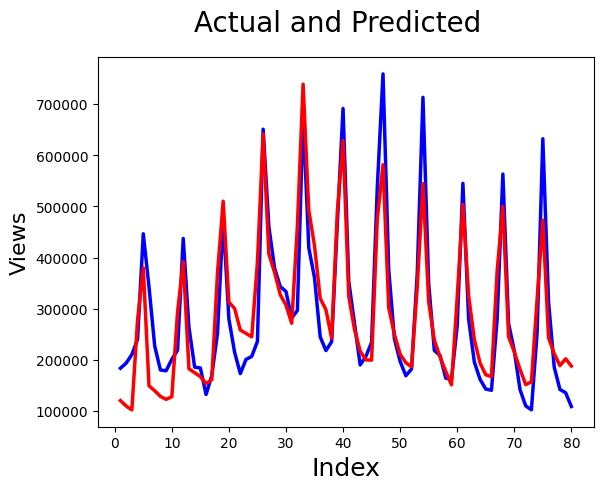

In [63]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

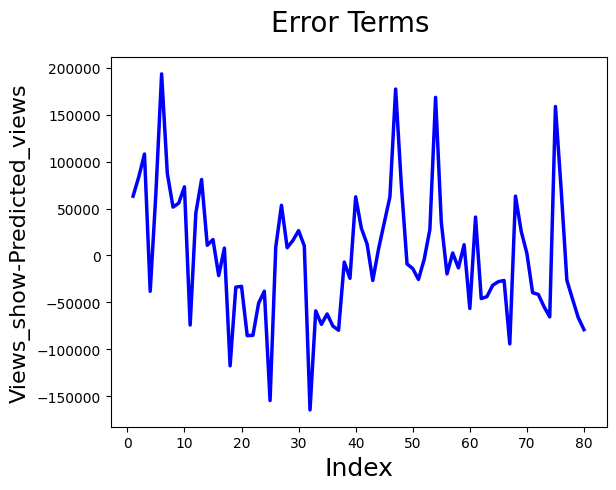

In [65]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label